## Data source (image) 
###### https://kmitlthailand-my.sharepoint.com/:x:/g/personal/66051053_kmitl_ac_th/EdKW5praf75JktRZlNOoY5EBIpljG9GNQ24P8GNiv_pi7A?e=s4ctAV

## Data Cleaning
###### https://kmitlthailand-my.sharepoint.com/:x:/g/personal/66051053_kmitl_ac_th/EQlK4rZ58_1Bq6tqwJuMuBgB9p-Ztt2hUWdmJ3Vx1fgFjw?e=DVu2b0

### Library version ที่ใช้
-pandas: 2.3.2
-numpy: 1.26.4
-scikit-learn: 1.6.1
-matplotlib: 3.9.4
-seaborn: 0.13.2
-imblearn: 0.12.4


In [72]:
# Import Library ที่สำคัญ
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import imblearn

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)
print("imblearn:", imblearn.__version__)

pandas: 2.3.2
numpy: 1.26.4
scikit-learn: 1.6.1
matplotlib: 3.9.4
imblearn: 0.12.4


In [73]:
# Import library ที่สำคัญ
# การคำนวณพื้นฐานและจัดการข้อมูล (Numerical & Data Handling) 
import numpy as np               # ใช้จัดการข้อมูลตัวเลขและ array
import pandas as pd              # ใช้จัดการข้อมูลในรูปแบบตาราง DataFrame

# การแสดงผล (Visualization) 
import matplotlib
import matplotlib.pyplot as plt  # สำหรับสร้างกราฟ Accuracy / Loss / Confusion Matrix
import seaborn as sns            # ใช้ตกแต่งกราฟให้อ่านง่าย

# TensorFlow สำหรับการสร้างโมเดล
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Scikit-learn สำหรับการสร้างโมเดล Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    log_loss
)

# การจัดการข้อมูลไม่สมดุล (Data Balancing)
from imblearn.over_sampling import SMOTE, RandomOverSampler

# ฟังก์ชันทั่วไป (Utility)
import random
import re


In [74]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## Train 1 (Data Cleaning)

In [75]:
import pandas as pd

df = pd.read_excel("leaflet(1).xlsx")
print(df.columns.tolist())

['generics', 'dosage_strengths', 'indications', 'instructions', 'warnings']


In [76]:
!pip install seaborn

In [77]:
import pandas as pd
import numpy as np
import random
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [78]:
df = pd.read_excel("leaflet(1).xlsx")

# ตรวจสอบข้อมูลเบื้องต้น
print(df.head())
print(df.info())

              generics dosage_strengths  \
0           Amlodipine           2.5 mg   
1           แอมโลดิพีน           2.5 mg   
2   แอมโลดิพีน เบซิเลต           2.5 mg   
3  Amlodipine Besylate           2.5 mg   
4  Amlodipine Besilate           2.5 mg   

                                         indications  \
0  ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหั...   
1  ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหั...   
2  ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหั...   
3  ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหั...   
4  ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหั...   

                                        instructions  \
0  6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วย...   
1  6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วย...   
2  6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วย...   
3  6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วย...   
4  6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วย...   

                                            warnings  
0  ห้ามใช้ใน

In [79]:
# กำหนดคอลัมน์ที่ต้องการรวมเป็นข้อความ
text_cols = ['generics', 'dosage_strengths', 'indications', 'instructions', 'warnings']

# แปลงเป็นสตริงและ สตริงว่างเติมค่าแทน NaN ก่อนรวม
for c in text_cols:
    df[c] = df[c].fillna('').astype(str)

# รวมข้อความเป็นคอลัมน์text
df['text'] = df[text_cols].agg(' '.join, axis=1)

# เอาเฉพาะแถวที่มี label (generics) จริง ๆ
df = df[df['generics'].str.strip() != '']

In [80]:
from imblearn.over_sampling import RandomOverSampler

In [81]:
#แยกฟีเจอร์และเลเบล แบ่งเป็นแบบ train test โดยรักษาสัดส่วนแต่ละคลาส (stratify)
X = df['text']
y = df['generics']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga', max_iter=300, tol=1e-3)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4, zero_division=0))


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.8097345132743363
                                precision    recall  f1-score   support

            Activated Charcoal     0.0000    0.0000    0.0000         2
            Activated charcoal     0.0000    0.0000    0.0000         2
                     Acyclovir     0.0000    0.0000    0.0000         3
                        Aescin     1.0000    1.0000    1.0000         2
                   Allopurinol     1.0000    1.0000    1.0000         1
           Aluminium Hydroxide     1.0000    1.0000    1.0000         3
                     Ambroxol      1.0000    1.0000    1.0000         2
        Ambroxol Hydrochloride     1.0000    1.0000    1.0000         1
                 Amitriptyline     1.0000    1.0000    1.0000         1
             Amitriptyline HCI     1.0000    1.0000    1.0000         1
   Amitriptyline Hydrochloride     1.0000    1.0000    1.0000         1
                    Amlodipine     0.2500    0.2000    0.2222         5
           Amlodipine Besilate    

In [84]:
if 'df' not in globals():
    import pandas as pd
    df = pd.read_excel('leaflet(1).xlsx')

need_text = 'text' not in df.columns
if need_text:
    for c in ['generics','dosage_strengths','indications','instructions','warnings']:
        if c in df.columns:
            df[c] = df[c].fillna('').astype(str)
        else:
            df[c] = ''  # กันพลาดกรณีคอลัมน์ขาด
    df['text'] = (df['generics'] + ' ' + df['dosage_strengths'] + ' ' +
                  df['indications'] + ' ' + df['instructions'] + ' ' +
                  df['warnings'])

if 'X_train' not in globals() or 'y_train' not in globals():
    from sklearn.model_selection import train_test_split
    X = df['text']
    y = df['generics'].astype(str)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

if 'X_train_tfidf' not in globals():
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
    X_train_tfidf = vectorizer.fit_transform(X_train)

random_state=42 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)

#print("✅ พร้อมแล้ว:")
print("X_resampled:", X_resampled.shape, "| y_resampled:", y_resampled.shape)


X_resampled: (4858, 10000) | y_resampled: (4858,)


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [85]:
whos

Variable                  Type                  Data/Info
---------------------------------------------------------
ERROR_RATE                float                 0.05
G                         csr_matrix              (0, 0)	0.12097303275897<...>4429)	0.15436661761381482
GENERIC_COL               str                   generics
LogisticRegression        type                  <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
N_ADD_PER_CLASS           int                   500
OUT_PATH                  str                   leaflet_train.xlsx
RandomOverSampler         ABCMeta               <class 'imblearn.over_sam<...>mpler.RandomOverSampler'>
SGDClassifier             ABCMeta               <class 'sklearn.linear_mo<...>_gradient.SGDClassifier'>
SHEET                     NoneType              None
SMOTE                     ABCMeta               <class 'imblearn.over_sam<...>pling._smote.base.SMOTE'>
SRC_PATH                  str                   leaflet(1).xlsx
SYN_RULES         

## epoch

## ปรับปรุงกราฟของ Data Cleaning 
###### log_loss เพี้ยน เพราะใช้ labels ไม่ตรงกับลำดับโปรบาบิลิตี 
###### predict_proba ของโมเดลเรียงคอลัมน์ตาม sgd.classes_
###### ชุดที่ใช้วัดผลไม่ชัด (ตัวแปร X_tr/X_val) อ้าง X_tr, y_tr, X_val, y_val แต่ไม่ได้ล็อกนิยามให้ชัดเจน
###### กำหนด classes = np.unique(y_resampled) อาจไม่ครอบคลุมคลาสใน y_val บางตัว

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 01/10 | acc_tr=0.5095 acc_val=0.5000 | loss_tr=1.5602 loss_val=1.5843


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 02/10 | acc_tr=0.5453 acc_val=0.5370 | loss_tr=1.4299 loss_val=1.4541


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 03/10 | acc_tr=0.5564 acc_val=0.5484 | loss_tr=1.3936 loss_val=1.4182


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 04/10 | acc_tr=0.5612 acc_val=0.5525 | loss_tr=1.3796 loss_val=1.4045


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 05/10 | acc_tr=0.5641 acc_val=0.5545 | loss_tr=1.3734 loss_val=1.3984


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 06/10 | acc_tr=0.5692 acc_val=0.5576 | loss_tr=1.3705 loss_val=1.3957


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 07/10 | acc_tr=0.5713 acc_val=0.5597 | loss_tr=1.3693 loss_val=1.3944


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 08/10 | acc_tr=0.5713 acc_val=0.5597 | loss_tr=1.3687 loss_val=1.3938


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 09/10 | acc_tr=0.5713 acc_val=0.5597 | loss_tr=1.3684 loss_val=1.3935


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 10/10 | acc_tr=0.5713 acc_val=0.5597 | loss_tr=1.3683 loss_val=1.3934


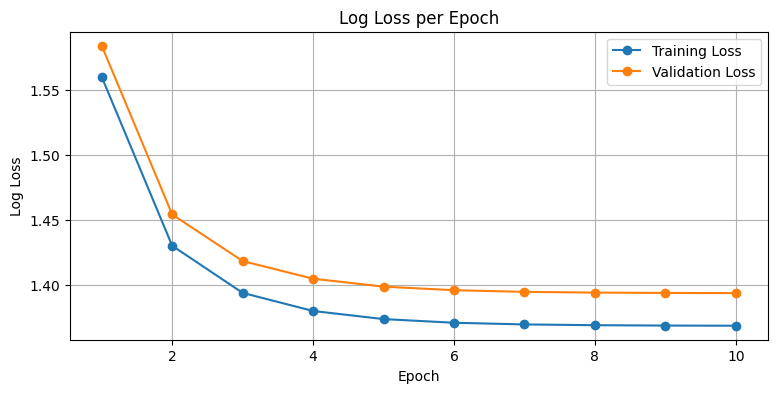

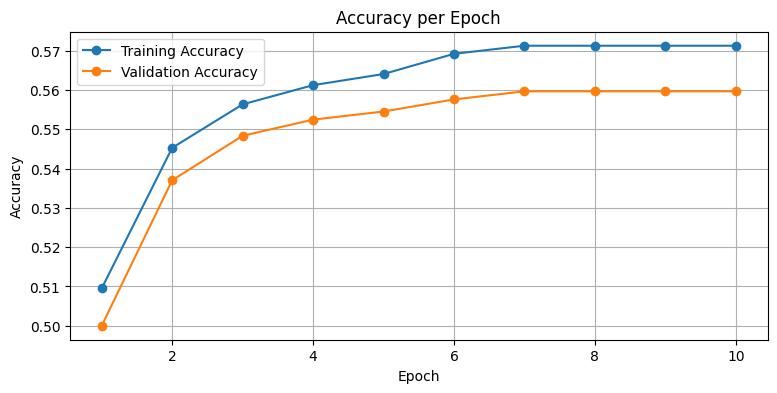

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1) แบ่ง Train/Validation จากชุดที่ oversample มาแล้ว
X_tr, X_val, y_tr, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 2) ตั้งค่า Logistic Regression (เทรนแบบ incremental)
epochs = 10  # จำนวนรอบเทรน
model_epoch = LogisticRegression(
    solver='saga',         # รองรับ sparse matrix ได้ดี
    penalty='l2',          # เพิ่ม regularization ให้เสถียร
    C=1.0,                 # ลดค่าถ้า overfitting (0.5, 0.1)
    max_iter=1,            # เทรนครั้งละ 1 iteration ต่อ epoch
    warm_start=True,       # ต่อจากน้ำหนักเดิมทุก epoch
    n_jobs=-1,             # ใช้หลาย core เพื่อความเร็ว
    random_state=42
)

train_loss, val_loss, train_acc, val_acc = [], [], [], []

# 3) วนเทรนหลาย epoch
for ep in range(1, epochs+1):
    model_epoch.fit(X_tr, y_tr)

    # ---- Train metrics ----
    ytr_pred = model_epoch.predict(X_tr)
    ytr_prob = model_epoch.predict_proba(X_tr)
    acc_tr   = accuracy_score(y_tr, ytr_pred)
    loss_tr  = log_loss(y_tr, ytr_prob, labels=model_epoch.classes_)

    # ---- Validation metrics ----
    yv_pred = model_epoch.predict(X_val)
    yv_prob = model_epoch.predict_proba(X_val)
    acc_val = accuracy_score(y_val, yv_pred)
    loss_val = log_loss(y_val, yv_prob, labels=model_epoch.classes_)

    # ---- เก็บค่า ----
    train_acc.append(acc_tr)
    val_acc.append(acc_val)
    train_loss.append(loss_tr)
    val_loss.append(loss_val)

    print(f"Epoch {ep:02d}/{epochs} | "
          f"acc_tr={acc_tr:.4f} acc_val={acc_val:.4f} | "
          f"loss_tr={loss_tr:.4f} loss_val={loss_val:.4f}")

# 4) กราฟ Loss ต่อ epoch
plt.figure(figsize=(9,4))
plt.plot(range(1, epochs+1), train_loss, marker='o', label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, marker='o', label='Validation Loss')
plt.title('Log Loss per Epoch')
plt.xlabel('Epoch'); plt.ylabel('Log Loss')
plt.grid(True); plt.legend(); plt.show()

# 5) กราฟ Accuracy ต่อ epoch
plt.figure(figsize=(9,4))
plt.plot(range(1, epochs+1), train_acc, marker='o', label='Training Accuracy')
plt.plot(range(1, epochs+1), val_acc, marker='o', label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.grid(True); plt.legend(); plt.show()


[SGD] Epoch 01/10 | acc_tr=0.580546 acc_val=0.576132 | loss_tr=2.223061 loss_val=2.216313
[SGD] Epoch 02/10 | acc_tr=0.642306 acc_val=0.644033 | loss_tr=2.081498 loss_val=2.075934
[SGD] Epoch 03/10 | acc_tr=0.686310 acc_val=0.683128 | loss_tr=2.014906 loss_val=2.010878
[SGD] Epoch 04/10 | acc_tr=0.772002 acc_val=0.775720 | loss_tr=1.976062 loss_val=1.970086
[SGD] Epoch 05/10 | acc_tr=0.791302 acc_val=0.797325 | loss_tr=1.948453 loss_val=1.944594
[SGD] Epoch 06/10 | acc_tr=0.858466 acc_val=0.861111 | loss_tr=1.919383 loss_val=1.911186
[SGD] Epoch 07/10 | acc_tr=0.880854 acc_val=0.884774 | loss_tr=1.905045 loss_val=1.897967
[SGD] Epoch 08/10 | acc_tr=0.890118 acc_val=0.888889 | loss_tr=1.891535 loss_val=1.885219
[SGD] Epoch 09/10 | acc_tr=0.888060 acc_val=0.897119 | loss_tr=1.883212 loss_val=1.876787
[SGD] Epoch 10/10 | acc_tr=0.903757 acc_val=0.916667 | loss_tr=1.872916 loss_val=1.866156


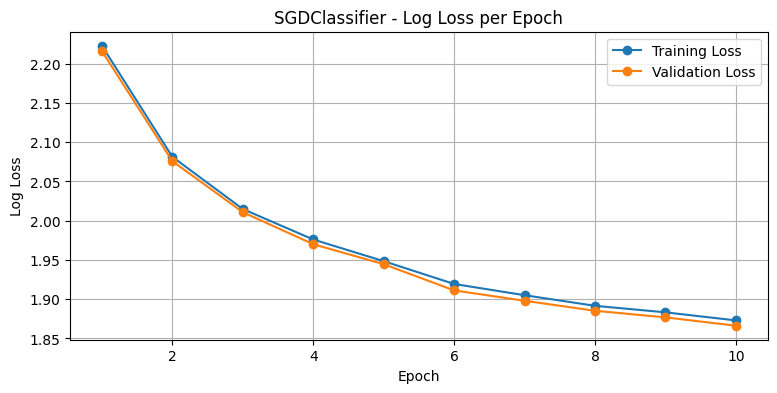

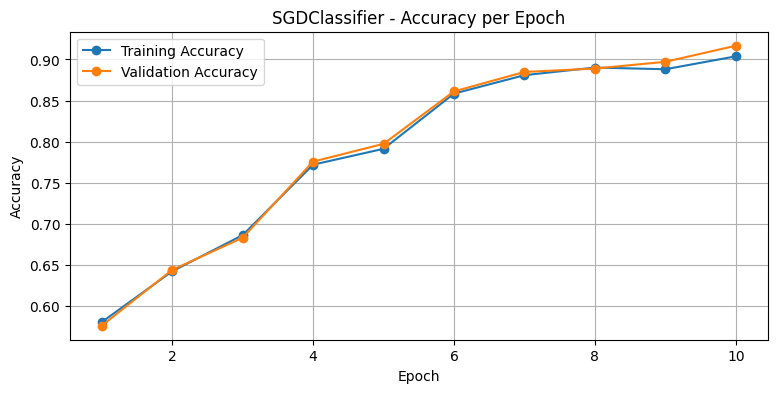

In [87]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss
import numpy as np
import matplotlib.pyplot as plt

# ===== ตั้งค่า =====
epochs = 10
batch_size = 2048
classes = np.unique(y_resampled)

# ===== โมเดล =====
sgd = SGDClassifier(
    loss='log_loss',
    alpha=1e-4,
    learning_rate='optimal',
    early_stopping=False,
    class_weight=None,
    random_state=42
)

# ===== เตรียมเก็บค่าเพื่อพล็อต =====
train_acc_list, val_acc_list = [], []
train_loss_list, val_loss_list = [], []

# ===== เริ่มเทรน =====
n = X_resampled.shape[0]
for ep in range(1, epochs+1):
    # shuffle index ทุก epoch
    idx = np.random.permutation(n)
    X_shuf = X_resampled[idx]
    y_shuf = y_resampled.iloc[idx] if hasattr(y_resampled, "iloc") else y_resampled[idx]

    # mini-batch training
    start = 0
    while start < n:
        end = min(start + batch_size, n)
        Xb, yb = X_shuf[start:end], y_shuf[start:end]
        if ep == 1 and start == 0:
            sgd.partial_fit(Xb, yb, classes=classes)
        else:
            sgd.partial_fit(Xb, yb)
        start = end

    # ==== คำนวณ metric ต่อ epoch ====
    ytr = sgd.predict(X_tr)
    ytrp = sgd.predict_proba(X_tr)
    yv = sgd.predict(X_val)
    yvp = sgd.predict_proba(X_val)

    acc_tr = accuracy_score(y_tr, ytr)
    acc_val = accuracy_score(y_val, yv)
    loss_tr = log_loss(y_tr, ytrp, labels=classes)
    loss_val = log_loss(y_val, yvp, labels=classes)

    train_acc_list.append(acc_tr)
    val_acc_list.append(acc_val)
    train_loss_list.append(loss_tr)
    val_loss_list.append(loss_val)

    print(f"[SGD] Epoch {ep:02d}/{epochs} | "
          f"acc_tr={acc_tr:.6f} acc_val={acc_val:.6f} | "
          f"loss_tr={loss_tr:.6f} loss_val={loss_val:.6f}")

# ===== พล็อตกราฟหลังเทรนเสร็จ =====
epochs_range = range(1, epochs + 1)

# --- Loss ---
plt.figure(figsize=(9,4))
plt.plot(epochs_range, train_loss_list, marker='o', label='Training Loss')
plt.plot(epochs_range, val_loss_list, marker='o', label='Validation Loss')
plt.title('SGDClassifier - Log Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.grid(True)
plt.legend()
plt.show()

# --- Accuracy ---
plt.figure(figsize=(9,4))
plt.plot(epochs_range, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(epochs_range, val_acc_list, marker='o', label='Validation Accuracy')
plt.title('SGDClassifier - Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


# Data Set Augmentation

In [89]:
import pandas as pd
import numpy as np
import random
import re

# -----------------------------
# ตั้งค่า
# -----------------------------
SRC_PATH  = "leaflet(1).xlsx"         # ไฟล์ต้นทาง
SHEET     = None                      # ถ้ารู้ชื่อชีตให้ใส่ เช่น "leaflet" ไม่งั้นปล่อย None = ชีตแรก
OUT_PATH  = "leaflet_train.xlsx"  # ไฟล์ผลลัพธ์
N_ADD_PER_CLASS = 500                 # จำนวน "แถวใหม่" ต่อคลาส
ERROR_RATE       = 0.05               # สัดส่วน error ต่อคลาส (0.05 = 5%)

# -----------------------------
# ตัวช่วยอ่านชีต
# -----------------------------
def load_excel(path, sheet=None):
    if sheet is not None:
        return pd.read_excel(path, sheet_name=sheet)
    # ถ้าไม่ระบุชีต → อ่านชีตแรก
    xls = pd.ExcelFile(path)
    first = xls.sheet_names[0]
    return pd.read_excel(path, sheet_name=first)

# -----------------------------
# โหลดไฟล์
# -----------------------------
df = load_excel(SRC_PATH, sheet=SHEET)

# normalize ชื่อคอลัมน์ (ลบช่องว่างหัวท้าย + lower ไว้หาตำแหน่งคอลัมน์)
col_map = {c: c.strip() if isinstance(c, str) else c for c in df.columns}
df = df.rename(columns=col_map)
lower_cols = {c.lower(): c for c in df.columns if isinstance(c, str)}

# คอลัมน์หลัก
if "generics" not in lower_cols:
    raise ValueError("ไม่พบคอลัมน์ชื่อยา 'generics' ในไฟล์ Excel")
GENERIC_COL = lower_cols["generics"]

# หา target columns ที่มีจริงในไฟล์ (รองรับทั้งบางส่วน/ทั้งหมด)
candidate_targets = ["dosage_strength", "instructions", "warnings", "indications"]
TARGET_COLS = [lower_cols[c] for c in candidate_targets if c in lower_cols]

if not TARGET_COLS:
    print("คำเตือน: ไม่พบคอลัมน์เป้าหมาย (dosage_strength / instructions / warnings / indications) — จะสร้างเฉพาะแถวใหม่โดยยกค่าจาก seed")
else:
    print("จะทำ variation ให้คอลัมน์:", TARGET_COLS)

# -----------------------------
# รวมชื่อ variant เป็น class เดียว
# -----------------------------
def canonical_generic(name: str) -> str:
    if pd.isna(name):
        return ""
    s = str(name).lower().strip()
    s = re.sub(r"\s+", " ", s)
    # รวม salt/spelling/ภาษาไทยเป็นคลาสเดียว
    s = s.replace("แอมโลดิพีน", "amlodipine")
    s = s.replace("แอมโลดิพีน เบซิเลต", "amlodipine besylate")
    s = s.replace("besilate", "besylate")
    # เอาคำว่า besylate ออก เพื่อให้ amlodipine และ amlodipine besylate รวมเป็น class เดียว
    s = s.replace("besylate", "")
    # กวาดสัญลักษณ์/วงเล็บ
    s = re.sub(r"[()\-_.]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["_class_key"] = df[GENERIC_COL].map(canonical_generic)

# -----------------------------
# พจนานุกรมคำสลับ (ทั้งไทย/อังกฤษ)
# -----------------------------
SYN_RULES = [
    (r"\bผู้ใหญ่\b", ["คนโต", "ผู้ป่วยผู้ใหญ่"]),
    (r"\bเด็ก\b", ["ผู้เยาว์", "เด็กเล็ก"]),
    (r"มิลลิกรัม\b", ["มก.", "มก", "milligram", "mg"]),
    (r"\bmg\b", ["มก", "milligram", "มก."]),
    (r"\bชั่วโมง\b", ["ชม.", "ชั่วโมงละ", "ต่อชั่วโมง"]),
    (r"\bต่อวัน\b", ["/วัน", "ต่อ 24 ชั่วโมง"]),
    (r"\bรับประทาน\b", ["ทาน", "กิน"]),
    (r"\bควรใช้\b", ["ควรจะใช้", "แนะนำให้ใช้"]),
    (r"\bห้ามใช้\b", ["ห้าม", "ไม่ควรใช้"]),
    (r"\bความดันโลหิตสูง\b", ["HT", "Hypertension"]),
    (r"\bโรคหลอดเลือดหัวใจตีบ\b", ["กล้ามเนื้อหัวใจขาดเลือด", "Angina Pectoris"]),
    (r"\bCAD\b", ["โรคหลอดเลือดหัวใจตีบที่ได้รับการวินิจฉัยแล้ว", "Coronary Artery Disease"]),
    (r"\bระมัดระวัง\b", ["ควรระวัง", "ใช้ด้วยความระวัง"]),
]

# -----------------------------
# ตัวช่วยปรับคำ/หน่วย/ตัวเลข
# -----------------------------
def apply_synonyms(text: str, max_rules: int = 3, p_apply: float = 0.6) -> str:
    if not isinstance(text, str) or not text.strip():
        return text
    out = text
    # ใช้สุ่มได้สูงสุด max_rules รายการต่อข้อความ
    rules = random.sample(SYN_RULES, k=min(max_rules, len(SYN_RULES)))
    for pat, repls in rules:
        if random.random() < p_apply and re.search(pat, out):
            out = re.sub(pat, random.choice(repls), out)
    return out
    

def tweak_numbers(text: str, p_apply: float = 0.35) -> str:
    if not isinstance(text, str) or not text.strip():
        return text
    if random.random() >= p_apply:
        return text

def small_typo(text: str) -> str:
    """สุ่มพิมพ์ผิดเล็กน้อย 1 จุด (สำหรับ error <= 5%)"""
    if not isinstance(text, str) or len(text) < 3:
        return text
    i = random.randrange(len(text))
    c = text[i]
    repl = {
        "0": "O", "O": "0", "1": "l", "l": "1", "i": "1", "g": "9", "9": "g",
        "ี": "ิ", "้": "๊", "า": "ำ"
    }.get(c, None)
    if repl is None:
        # ลบทิ้ง 1 ตัวอักษร
        return text[:i] + text[i+1:]
    return text[:i] + repl + text[i+1:]

    def bump_num(m):
        num = m.group(0)
        try:
            if "-" in num:
                a, b = num.split("-")
                a = str(max(1, int(a) + random.choice([-1, 0, 1])))
                b = str(max(1, int(b) + random.choice([-1, 0, 1])))
                return f"{a}-{b}"
            else:
                return str(max(1, int(num) + random.choice([-1, 0, 1])))
        except:
            return num

    return re.sub(r"\d+\-\d+|\d+", bump_num, text)

# -----------------------------
# สร้างแถวใหม่ต่อคลาส
# -----------------------------
aug_rows = []
for key in df["_class_key"].unique():
    grp = df[df["_class_key"] == key]
    if len(grp) == 0:
        continue
    seeds = grp.to_dict("records")
    to_add = N_ADD_PER_CLASS
    error_budget = int(round(to_add * ERROR_RATE))
    errors_made = 0
    attempts = 0

    while to_add > 0 and attempts < 20000:
        attempts += 1
        seed = random.choice(seeds)
        new_row = dict(seed)

        # ปรับแต่งเฉพาะคอลัมน์ใน TARGET_COLS ที่มีอยู่จริงในไฟล์
        for col in TARGET_COLS:
            v = seed.get(col, "")
            v = str(v)
            if col.lower() == "dosage_strength":
                v = vary_dosage_strength(v)
            else:
                v = apply_synonyms(v)
                v = tweak_numbers(v)

            new_row[col] = v

        # เพิ่ม error ไม่เกิน budget
        if errors_made < error_budget and random.random() < 0.10:
            err_col = random.choice(TARGET_COLS)
            new_row[err_col] = small_typo(new_row.get(err_col, ""))
            errors_made += 1

        aug_rows.append(new_row)
        to_add -= 1

# รวมเป็น DataFrame
aug_df = pd.DataFrame(aug_rows)

# รวมข้อมูลเดิม + ใหม่
final_df = pd.concat([df, aug_df], ignore_index=True)

# บันทึก
final_df.to_excel(OUT_PATH, index=False)
print(f"✅ Done! Saved to {OUT_PATH}")


จะทำ variation ให้คอลัมน์: ['instructions', 'warnings', 'indications']
✅ Done! Saved to leaflet_train.xlsx


# Train Data Set New

In [90]:
# เช็คตัวแปรในไฟล์ที่ดึงมา
import pandas as pd 

df = pd.read_excel("leaflet_train.xlsx")
print(df.columns.tolist())


['generics', 'dosage_strengths', 'indications', 'instructions', 'warnings', '_class_key']


In [91]:
# อ่านข้อมูลจากไฟล์
df = pd.read_excel("leaflet_train.xlsx")

# ตรวจสอบข้อมูลเบื้องต้น
print(df.head())
print(df.info())


              generics dosage_strengths  \
0           Amlodipine           2.5 mg   
1           แอมโลดิพีน           2.5 mg   
2   แอมโลดิพีน เบซิเลต           2.5 mg   
3  Amlodipine Besylate           2.5 mg   
4  Amlodipine Besilate           2.5 mg   

                                         indications  \
0  ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหั...   
1  ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหั...   
2  ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหั...   
3  ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหั...   
4  ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหั...   

                                        instructions  \
0  6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วย...   
1  6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วย...   
2  6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วย...   
3  6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วย...   
4  6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วย...   

                                            warnings          _clas

In [92]:
# ใช้ทำกราฟ
!pip install seaborn


In [93]:
# นำเข้าชุดเครื่องมือหลัก: แบ่งเทรน/ทดสอบ, TF‑IDF, โมเดล, metric, กราฟ, และตัวช่วย oversampling
import pandas as pd
import numpy as np
import random
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler


In [94]:
# กำหนดคอลัมน์ที่ต้องการรวมเป็นข้อความ
text_cols = ['generics', 'dosage_strengths', 'indications', 'instructions', 'warnings']

# แปลงเป็นสตริงและ สตริงว่างเติมค่าแทน NaN ก่อนรวม
for c in text_cols:
    df[c] = df[c].fillna('').astype(str)

# รวมข้อความเป็นคอลัมน์text
df['text'] = df[text_cols].agg(' '.join, axis=1)

# เอาเฉพาะแถวที่มี label (generics) จริง ๆ
df = df[df['generics'].str.strip() != '']

In [95]:
from imblearn.over_sampling import RandomOverSampler

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
X = df['text']
y = df['generics']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [98]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga', max_iter=300, tol=1e-3)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4, zero_division=0))


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.9732547415694294
                                precision    recall  f1-score   support

            Activated Charcoal     0.5088    0.3919    0.4427        74
            Activated charcoal     0.5312    0.6456    0.5829        79
                     Acyclovir     1.0000    1.0000    1.0000       153
                        Aescin     1.0000    1.0000    1.0000       152
                   Allopurinol     1.0000    1.0000    1.0000       152
           Aluminium Hydroxide     1.0000    1.0000    1.0000       153
                     Ambroxol      1.0000    1.0000    1.0000       152
        Ambroxol Hydrochloride     1.0000    1.0000    1.0000       151
                 Amitriptyline     1.0000    1.0000    1.0000       152
             Amitriptyline HCI     1.0000    1.0000    1.0000       151
   Amitriptyline Hydrochloride     1.0000    1.0000    1.0000       151
                    Amlodipine     0.3667    0.5366    0.4356        41
           Amlodipine Besilate    

In [99]:
if 'df' not in globals():
    import pandas as pd
    df = pd.read_excel('leaflet_train.xlsx')

need_text = 'text' not in df.columns
if need_text:
    for c in ['generics','dosage_strengths','indications','instructions','warnings']:
        if c in df.columns:
            df[c] = df[c].fillna('').astype(str)
        else:
            df[c] = ''  # กันพลาดกรณีคอลัมน์ขาด
    df['text'] = (df['generics'] + ' ' + df['dosage_strengths'] + ' ' +
                  df['indications'] + ' ' + df['instructions'] + ' ' +
                  df['warnings'])

if 'X_train' not in globals() or 'y_train' not in globals():
    from sklearn.model_selection import train_test_split
    X = df['text']
    y = df['generics'].astype(str)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

if 'X_train_tfidf' not in globals():
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
    X_train_tfidf = vectorizer.fit_transform(X_train)

random_state=42 #เพื่อให้ผล oversampling ทำซ้ำได้
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)


print("X_resampled:", X_resampled.shape, "| y_resampled:", y_resampled.shape)


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


X_resampled: (126308, 10000) | y_resampled: (126308,)


In [100]:
whos 

Variable                  Type                  Data/Info
---------------------------------------------------------
ERROR_RATE                float                 0.05
G                         csr_matrix              (0, 0)	0.12097303275897<...>4429)	0.15436661761381482
GENERIC_COL               str                   generics
LogisticRegression        type                  <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
N_ADD_PER_CLASS           int                   500
OUT_PATH                  str                   leaflet_train.xlsx
RandomOverSampler         ABCMeta               <class 'imblearn.over_sam<...>mpler.RandomOverSampler'>
SGDClassifier             ABCMeta               <class 'sklearn.linear_mo<...>_gradient.SGDClassifier'>
SHEET                     NoneType              None
SMOTE                     ABCMeta               <class 'imblearn.over_sam<...>pling._smote.base.SMOTE'>
SRC_PATH                  str                   leaflet(1).xlsx
SYN_RULES         

# Epoch Data Set Augmeatation

In [101]:
# 1) แบ่ง Train/Validation จากชุดที่ oversample มาแล้ว
X_tr, X_val, y_tr, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

ใช้ข้อมูลจาก: leaflet_train.xlsx


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 01/10 | acc_tr=0.9495 acc_val=0.9496 | loss_tr=0.2175 loss_val=0.2193


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 02/10 | acc_tr=0.9503 acc_val=0.9505 | loss_tr=0.2330 loss_val=0.2355


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 03/10 | acc_tr=0.9503 acc_val=0.9508 | loss_tr=0.2295 loss_val=0.2320


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 04/10 | acc_tr=0.9503 acc_val=0.9508 | loss_tr=0.2291 loss_val=0.2316


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 05/10 | acc_tr=0.9504 acc_val=0.9508 | loss_tr=0.2289 loss_val=0.2314


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 06/10 | acc_tr=0.9504 acc_val=0.9508 | loss_tr=0.2289 loss_val=0.2314


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 07/10 | acc_tr=0.9504 acc_val=0.9508 | loss_tr=0.2289 loss_val=0.2314


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 08/10 | acc_tr=0.9504 acc_val=0.9508 | loss_tr=0.2289 loss_val=0.2314


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 09/10 | acc_tr=0.9504 acc_val=0.9508 | loss_tr=0.2288 loss_val=0.2314


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 10/10 | acc_tr=0.9504 acc_val=0.9508 | loss_tr=0.2288 loss_val=0.2314


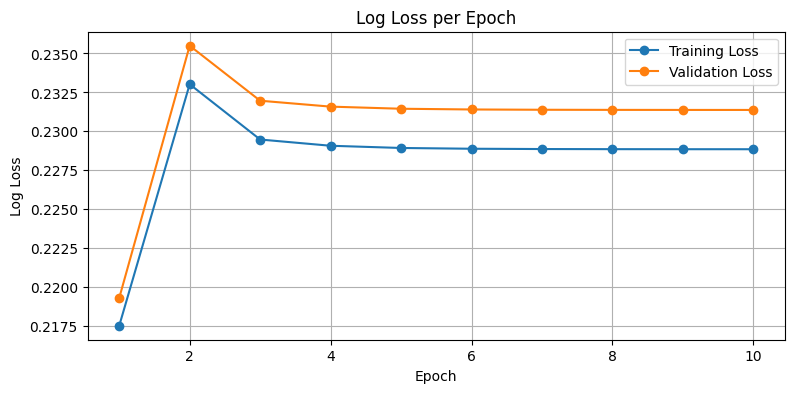

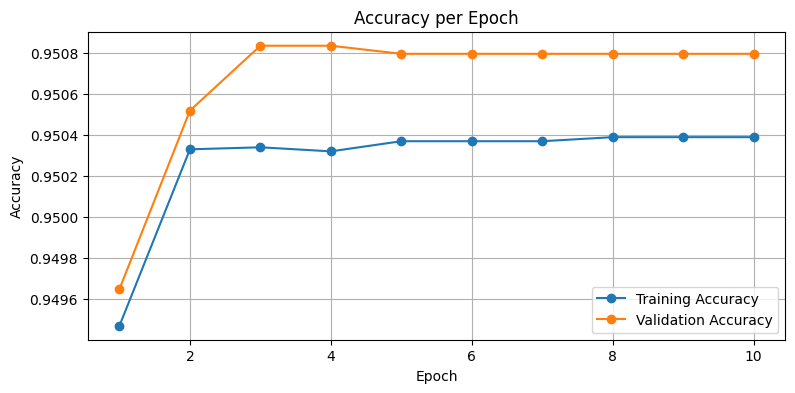

In [102]:
import pandas as pd
df = pd.read_excel("leaflet_train.xlsx")
print("ใช้ข้อมูลจาก: leaflet_train.xlsx")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 2) ตั้งค่า Logistic Regression (เทรนแบบ incremental)
epochs = 10  # จำนวนรอบเทรน
model_epoch = LogisticRegression(
    solver='saga',         # รองรับ sparse matrix ได้ดี
    penalty='l2',          # เพิ่ม regularization ให้เสถียร
    C=1.0,                 # ลดค่าถ้า overfitting (0.5, 0.1)
    max_iter=1,            # เทรนครั้งละ 1 iteration ต่อ epoch
    warm_start=True,       # ต่อจากน้ำหนักเดิมทุก epoch
    n_jobs=-1,             # ใช้หลาย core เพื่อความเร็ว
    random_state=42
)

train_loss, val_loss, train_acc, val_acc = [], [], [], []

# 3) วนเทรนหลาย epoch
for ep in range(1, epochs+1):
    model_epoch.fit(X_tr, y_tr)

    # ---- Train metrics ----
    ytr_pred = model_epoch.predict(X_tr)
    ytr_prob = model_epoch.predict_proba(X_tr)
    acc_tr   = accuracy_score(y_tr, ytr_pred)
    loss_tr  = log_loss(y_tr, ytr_prob, labels=model_epoch.classes_)

    # ---- Validation metrics ----
    yv_pred = model_epoch.predict(X_val)
    yv_prob = model_epoch.predict_proba(X_val)
    acc_val = accuracy_score(y_val, yv_pred)
    loss_val = log_loss(y_val, yv_prob, labels=model_epoch.classes_)

    # ---- เก็บค่า ----
    train_acc.append(acc_tr)
    val_acc.append(acc_val)
    train_loss.append(loss_tr)
    val_loss.append(loss_val)

    print(f"Epoch {ep:02d}/{epochs} | "
          f"acc_tr={acc_tr:.4f} acc_val={acc_val:.4f} | "
          f"loss_tr={loss_tr:.4f} loss_val={loss_val:.4f}")

# 4) กราฟ Loss ต่อ epoch
plt.figure(figsize=(9,4))
plt.plot(range(1, epochs+1), train_loss, marker='o', label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, marker='o', label='Validation Loss')
plt.title('Log Loss per Epoch')
plt.xlabel('Epoch'); plt.ylabel('Log Loss')
plt.grid(True); plt.legend(); plt.show()

# 5) กราฟ Accuracy ต่อ epoch
plt.figure(figsize=(9,4))
plt.plot(range(1, epochs+1), train_acc, marker='o', label='Training Accuracy')
plt.plot(range(1, epochs+1), val_acc, marker='o', label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.grid(True); plt.legend(); plt.show()

from sklearn.metrics import classification_report



## ปรับปรุงกราฟของ Data Set Augmentation
###### log_loss เพี้ยน เพราะใช้ labels ไม่ตรงกับลำดับโปรบาบิลิตี 
###### predict_proba ของโมเดลเรียงคอลัมน์ตาม sgd.classes_
###### ชุดที่ใช้วัดผลไม่ชัด (ตัวแปร X_tr/X_val) อ้าง X_tr, y_tr, X_val, y_val แต่ไม่ได้ล็อกนิยามให้ชัดเจน
###### กำหนด classes = np.unique(y_resampled) อาจไม่ครอบคลุมคลาสใน y_val บางตัว

[SGD] Epoch 01/10 | acc_tr=0.922204 acc_val=0.924669 | loss_tr=1.828528 loss_val=1.826870
[SGD] Epoch 02/10 | acc_tr=0.939859 acc_val=0.941018 | loss_tr=1.771386 loss_val=1.769774
[SGD] Epoch 03/10 | acc_tr=0.944995 acc_val=0.947233 | loss_tr=1.740836 loss_val=1.739250
[SGD] Epoch 04/10 | acc_tr=0.945945 acc_val=0.945333 | loss_tr=1.721519 loss_val=1.719966
[SGD] Epoch 05/10 | acc_tr=0.945926 acc_val=0.947154 | loss_tr=1.706612 loss_val=1.705147
[SGD] Epoch 06/10 | acc_tr=0.946767 acc_val=0.947668 | loss_tr=1.695021 loss_val=1.693486
[SGD] Epoch 07/10 | acc_tr=0.945965 acc_val=0.946125 | loss_tr=1.685175 loss_val=1.683617
[SGD] Epoch 08/10 | acc_tr=0.947084 acc_val=0.946085 | loss_tr=1.676949 loss_val=1.675417
[SGD] Epoch 09/10 | acc_tr=0.946302 acc_val=0.945808 | loss_tr=1.669880 loss_val=1.668376
[SGD] Epoch 10/10 | acc_tr=0.946133 acc_val=0.946798 | loss_tr=1.663804 loss_val=1.662296


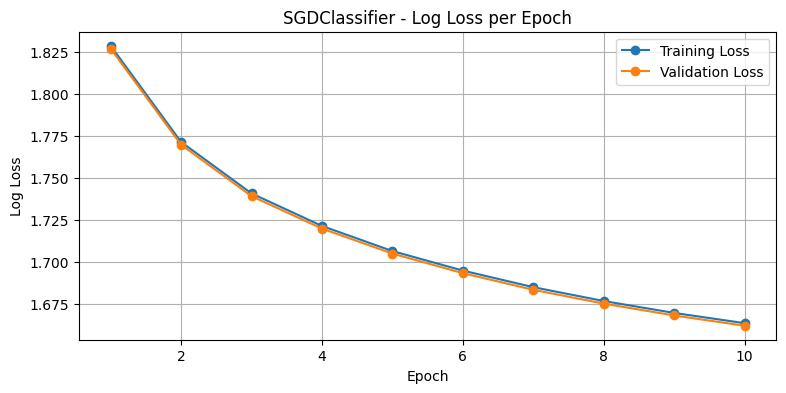

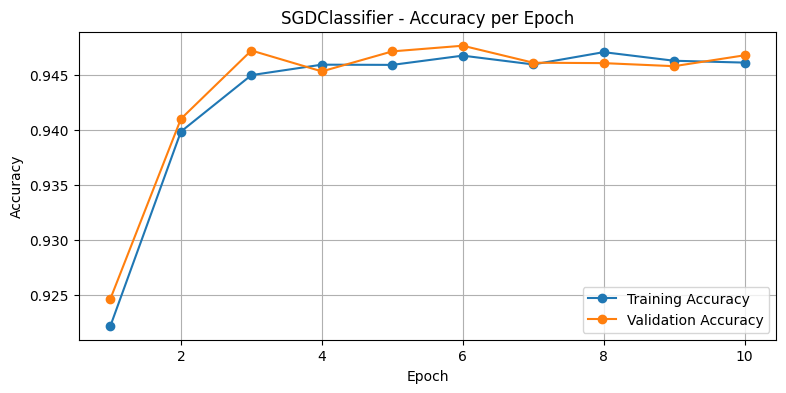

In [103]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss
import numpy as np
import matplotlib.pyplot as plt

# ===== ตั้งค่า =====
epochs = 10
batch_size = 2048
classes = np.unique(y_resampled)

# ===== โมเดล =====
sgd = SGDClassifier(
    loss='log_loss',
    alpha=1e-4,
    learning_rate='optimal',
    early_stopping=False,
    class_weight=None,
    random_state=42
)

# ===== เตรียมเก็บค่าเพื่อพล็อต =====
train_acc_list, val_acc_list = [], []
train_loss_list, val_loss_list = [], []

# ===== เริ่มเทรน =====
n = X_resampled.shape[0]
for ep in range(1, epochs+1):
    # shuffle index ทุก epoch
    idx = np.random.permutation(n)
    X_shuf = X_resampled[idx]
    y_shuf = y_resampled.iloc[idx] if hasattr(y_resampled, "iloc") else y_resampled[idx]

    # mini-batch training
    start = 0
    while start < n:
        end = min(start + batch_size, n)
        Xb, yb = X_shuf[start:end], y_shuf[start:end]
        if ep == 1 and start == 0:
            sgd.partial_fit(Xb, yb, classes=classes)
        else:
            sgd.partial_fit(Xb, yb)
        start = end

    # ==== คำนวณ metric ต่อ epoch ====
    ytr = sgd.predict(X_tr)
    ytrp = sgd.predict_proba(X_tr)
    yv = sgd.predict(X_val)
    yvp = sgd.predict_proba(X_val)

    acc_tr = accuracy_score(y_tr, ytr)
    acc_val = accuracy_score(y_val, yv)
    loss_tr = log_loss(y_tr, ytrp, labels=classes)
    loss_val = log_loss(y_val, yvp, labels=classes)

    train_acc_list.append(acc_tr)
    val_acc_list.append(acc_val)
    train_loss_list.append(loss_tr)
    val_loss_list.append(loss_val)

    print(f"[SGD] Epoch {ep:02d}/{epochs} | "
          f"acc_tr={acc_tr:.6f} acc_val={acc_val:.6f} | "
          f"loss_tr={loss_tr:.6f} loss_val={loss_val:.6f}")

# ===== พล็อตกราฟหลังเทรนเสร็จ =====
epochs_range = range(1, epochs + 1)

# --- Loss ---
plt.figure(figsize=(9,4))
plt.plot(epochs_range, train_loss_list, marker='o', label='Training Loss')
plt.plot(epochs_range, val_loss_list, marker='o', label='Validation Loss')
plt.title('SGDClassifier - Log Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.grid(True)
plt.legend()
plt.show()

# --- Accuracy ---
plt.figure(figsize=(9,4))
plt.plot(epochs_range, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(epochs_range, val_acc_list, marker='o', label='Validation Accuracy')
plt.title('SGDClassifier - Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


### Play Model

In [104]:
import joblib

joblib.dump(model, 'leaflet_realdata.joblib')
joblib.dump(vectorizer, 'leaflet_realdata1.joblib')

print("บันทึกโมเดลและเวกเตอร์ไรเซอร์เรียบร้อย")


บันทึกโมเดลและเวกเตอร์ไรเซอร์เรียบร้อย


In [105]:
# ====== เตรียมรายชื่อยา (ดึงจาก DataFrame) ======
# สมมุติว่าคุณมี df จาก leaflet_train.xlsx อยู่แล้ว และคอลัมน์ชื่อยา = 'generics'
generics_list = (
    df['generics']
    .dropna()
    .astype(str)
    .str.strip()
    .str.lower()             # ไม่สนพิมพ์เล็กใหญ่
    .unique()
    .tolist()
)

# ====== เวกเตอร์ไรซ์ด้วย character n-grams (เหมาะกับ partial match/ภาษาไทย) ======
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

# char_wb จะใส่ช่องว่าง padding ให้จับคำย่อยได้ดีขึ้น; n-grams 2–5 ช่วยทั้งไทย/อังกฤษ
char_vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2,5))
G = char_vectorizer.fit_transform(generics_list)  # ขนาด: n_generics x n_features

def search_generic_partial(query, topk=5, threshold=0.5):
    """
    คืน candidate top-k ตาม cosine similarity
    - query: string (เช่น 'พารา', 'para', 'amlod', ...)
    - threshold: รับผลเฉพาะที่ similarity >= threshold
    """
    q = str(query).strip().lower()
    if not q:
        return []

    qv = char_vectorizer.transform([q])
    sims = linear_kernel(qv, G)[0]   # cosine similarity ต่อ generic แต่ละตัว
    idx = np.argsort(-sims)[:topk]
    results = [(generics_list[i], float(sims[i])) for i in idx if sims[i] >= threshold]
    return results

# ====== ตัวอย่างทดลอง ======
print("ค้นหา: 'para'  → ", search_generic_partial("para", topk=5, threshold=0.25))
print("ค้นหา: 'Eugnol'  → ", search_generic_partial("Eugnol", topk=5, threshold=0.5))
print("ค้นหา: 'Amlodipine' → ", search_generic_partial("Amlodipine", topk=3, threshold=0.5))
#print(search_generic_partial("Eunol", topk=5, threshold=0.3))
#print(search_generic_partial("Eugnol", topk=5, threshold=0.3))
#print(search_generic_partial("Amlodipine", topk=5, threshold=0.3))
#print(search_generic_partial("พารา", topk=5, threshold=0.3))


ค้นหา: 'para'  →  [('paracetamol', 0.5013260917692989)]
ค้นหา: 'Eugnol'  →  [('eugenol', 0.6069127705107248)]
ค้นหา: 'Amlodipine' →  [('amlodipine', 1.0000000000000002), ('amlodipine besilate', 0.7283450554758952), ('amlodipine besylate', 0.7147530438272341)]


In [106]:
# ====== เตรียมข้อมูลจาก DataFrame ======
# df ต้องมีคอลัมน์: generics, strength, indication, dosage, warning
generics_list = (
    df['generics']
    .dropna()
    .astype(str)
    .str.strip()
    .str.lower()
    .unique()
    .tolist()
)

# ====== TF-IDF สำหรับ partial match ======
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

char_vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2,5))
G = char_vectorizer.fit_transform(generics_list)

def search_generic_detailed(query, topk=5, threshold=0.3):
    q = str(query).strip().lower()
    if not q:
        return "⚠️ กรุณากรอกชื่อยาที่ต้องการค้นหา"

    qv = char_vectorizer.transform([q])
    sims = linear_kernel(qv, G)[0]
    idx = np.argsort(-sims)[:topk]
    results = [(generics_list[i], float(sims[i])) for i in idx if sims[i] >= threshold]
    if not results:
        return "❌ ไม่พบยาที่ใกล้เคียง"

    print(f"\n🔍 ค้นหา: {query}\n{'='*60}")

    # ====== แสดงผลอันดับ 1 ======
    top1 = results[0]
    top1_name, top1_sim = top1
    row = df[df['generics'].str.lower().str.strip() == top1_name].head(1)

    if not row.empty:
        print(f" ชื่อยา: {top1_name.title()} ({top1_sim*100:.2f}%)")
        #print(f"   ปริมาณ: {row.iloc[0].get('dosage_strengths', '-')}")
        print(f"   สรรพคุณ: {row.iloc[0].get('indications', '-')}")
        print(f"   วิธีใช้: {row.iloc[0].get('instructions', '-')}")
        print(f"   ข้อควรระวัง: {row.iloc[0].get('warnings', '-')}")
    else:
        print(f" ชื่อยา: {top1_name.title()} ({top1_sim*100:.2f}%)")
        print("   ⚠️ ไม่พบรายละเอียดในฐานข้อมูล")

    # ====== แสดงอันดับ 2–3 (เฉพาะชื่อและ%) ======
    for rank, (name, sim) in enumerate(results[1:], start=2):
        print(f"{rank}. ชื่อยา: {name.title()} ({sim*100:.2f}%)")

# ====== ทดลองค้นหา ======
search_generic_detailed("พารา")
search_generic_detailed("Amlodi")
search_generic_detailed("Eunol")



🔍 ค้นหา: พารา
 ชื่อยา: พาราเซตามอล (49.80%)
   สรรพคุณ: ลดไข้, บรรเทาอาการปวดเล็กน้อยถึงปานกลาง
   วิธีใช้: เด็ก (อิงตามน้ำหนักตัว) : 10 - 15 mg./น้ำหนักตัว (กก.) : ทุก 4-6 ชั่วโมง
   ข้อควรระวัง: อันตรายต่อตับ (Liver Damage): ห้ามใช้ยาเกินขนาดที่แนะนำ, ผู้ที่มีปัญหาตับ, ไต

🔍 ค้นหา: Amlodi
 ชื่อยา: Amlodipine (70.75%)
   สรรพคุณ: ความดันโลหิตสูง (Hypertension), โรคหลอดเลือดหัวใจตีบ (Angina Pectoris), โรคหลอดเลือดหัวใจตีบที่ได้รับการวินิจฉัยแล้ว (CAD)
   วิธีใช้: 6-17 ปี (ความดันโลหิตสูง),  ผู้สูงอายุ ผู้ป่วยเฉพาะ (โรคเกี่ยวกับตับ,ร่างการเปราะบาง) : 1 ครั้ง/วัน
   ข้อควรระวัง: ห้ามใช้ในผู้ที่มีภาวะ ความดันโลหิตต่ำรุนแรง หรือภาวะช็อก ควรใช้ด้วยความระมัดระวังในผู้ป่วย โรคตับ หรือมีภาวะตับบกพร่อง
2. ชื่อยา: Amlodipine Besilate (51.26%)
3. ชื่อยา: Amlodipine Besylate (50.30%)

🔍 ค้นหา: Eunol
 ชื่อยา: Eugenol (44.16%)
   สรรพคุณ: เป็นยาชาเฉพาะที่และยาฆ่าเชื้ออ่อน ๆ ชนิดใช้ภายนอกในช่องปาก ใช้บรรเทาอาการปวดฟัน ปวดเหงือก หรือระคายเคืองในช่องปากเพื่อช่วยลดปวดและต้านเชื้อแบคทีเรียในบริเวณที่อัก

# Model Training 
-**อัตราส่วนข้อมูลที่ใช้ train : 70,30   seed 42**

#  การประเมินผลหลังปรับปรุง

-**Data (Cleaning)**
-**Accuracy: 0.8097345132743363 (ทั้งโมเดล)**
-**Accuracy 0.5713 : Loss 1.3683 (epoch ก่อนปรับปรุง)**
-**Accuracy 0.903757 : Loss 1.872916 (epoch หลังปรับปรุง)**

-**Data (augmentation)**
-**Accuracy: 0.9732547415694294 ทั้งโมเดล**
-**Accuracy 0.9504 : Loss 0.2288 -epochก่อนปรับปรุง**
-**Accuracy 0.946133 : Loss 1.663804 -epochหลังปรับปรุง**
